## MODIS Chlorophyll a 
input files and add time dimension to each one of them, and concatinate them into one file, and plot chlorophyl values

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import glob

In [ ]:
TempNCDFfiles = glob.glob('modis/*.nc', recursive=True)
#MODIS = xr.open_mfdataset(TempNCDFfiles,combine='by_coords')

#function to add TIME dimension to MODIS data:
Months={'01':'Jan','02':'Feb',
       '03':'Mar','04':'Apr',
       '05':'May','06':'Jun',
       '07':'Jul','08':'Aug',
       '09':'Sep','10':'Oct',
       '11':'Nov','12':'Dec',}

PARclimatology = []
for dataset in range(len(TempNCDFfiles)):
    PARclimatology.append(xr.open_dataset(TempNCDFfiles[dataset]))
    print(Months.get(PARclimatology[dataset].time_coverage_start[5:7]))
    PARclimatology[dataset] = PARclimatology[dataset].assign_coords(time=int(PARclimatology[dataset].time_coverage_start[5:7]))
    PARclimatology[dataset] = PARclimatology[dataset].expand_dims('time')
    PARclimatology[dataset].to_netcdf(path='modis/PAR_Climatology_'+Months.get(PARclimatology[dataset].time_coverage_start[5:7])+'.nc')


In [2]:
TempNCDFfiles2 = glob.glob('modis/PAR*.nc', recursive=True)
MODIS2 = xr.open_mfdataset(TempNCDFfiles2,combine='by_coords')

MODIS2X = MODIS2.drop_dims(['eightbitcolor','rgb'])
MODIS_df = MODIS2X.sel(lat=40,lon=-20, method='nearest').to_dataframe()

/glade/u/home/gabyn/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice


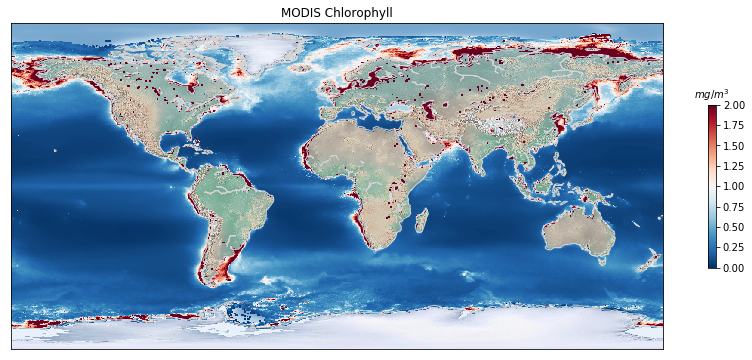

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

MODIS2X = MODIS2.drop_dims(['eightbitcolor','rgb'])

Lat = np.array(MODIS2X['lat'])
Lon = np.array(MODIS2X['lon'])
PAR = np.array(MODIS2X['chlor_a'])

Lats,Lons = np.meshgrid(Lat,Lon,indexing='ij')


fig = plt.figure(figsize=(16, 6), edgecolor='w')
ax = fig.add_subplot(1, 1, 1)
m = Basemap(projection='cyl',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
m.shadedrelief(scale=0.5)
pm =m.pcolormesh(Lons[::10,::10], Lats[::10,::10], np.nanmean(PAR[:,::10,::10], axis = 0), 
             latlon=True, cmap='RdBu_r', vmin = 0, vmax = 2)

m.drawcoastlines(color='lightgray')
ax.set_title('MODIS Chlorophyll')
cbar = fig.colorbar(pm, shrink=0.5)
cbar.ax.set_title('$mg/m^3$', fontsize = 10)

fig.savefig('chla_annual_modis_detailed_map.png', dpi=600, bbox_inches='tight')

/glade/u/home/gabyn/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


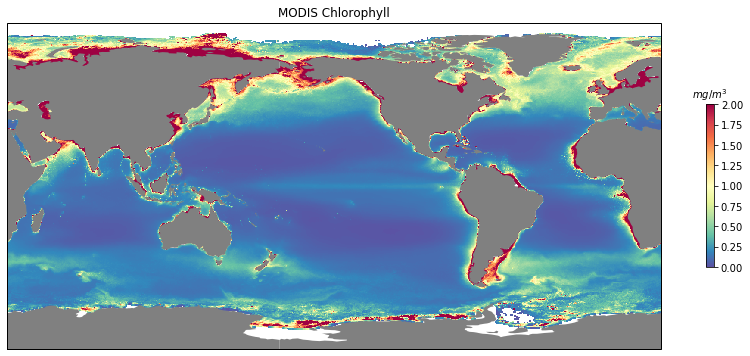

In [4]:
import cartopy
import cartopy.crs as ccrs
fig = plt.figure(figsize=(16, 6))
# minimum 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=210.0))
cf = ax.pcolor(Lons[::10,::10], Lats[::10,::10],np.nanmean(PAR[:,::10,::10], axis =0),
                 cmap='Spectral_r',transform=ccrs.PlateCarree(), vmin=0, vmax=2)
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('MODIS Chlorophyll')
cbar = fig.colorbar(cf, shrink=0.5)
cbar.ax.set_title('$mg/m^3$', fontsize = 10)
fig.savefig('chla_annual_modis.png', dpi=600, bbox_inches='tight')